<a href="https://colab.research.google.com/github/silverstar0727/many_body_problem/blob/master/opensource_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 구글 드라이브 연동
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd /content/gdrive/My Drive/sodo project

/content/gdrive/My Drive/sodo project


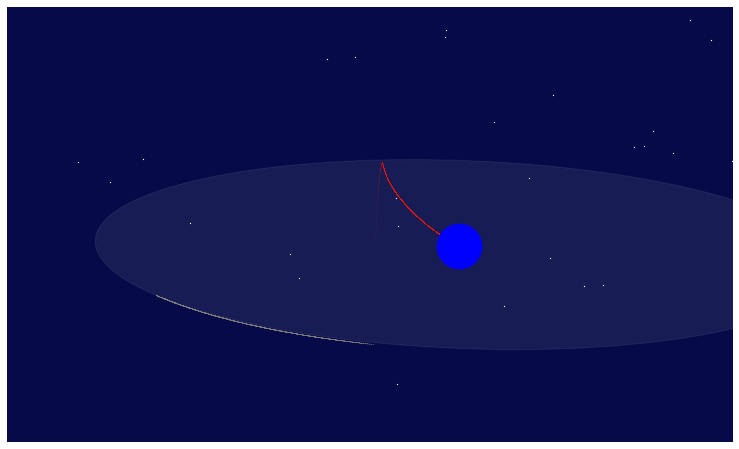

In [0]:
#!/usr/bin/env python3

"""
Three-body problem 
Spaceship-moon-earth system
"""

# Scientific libraries

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch, Circle
import mpl_toolkits.mplot3d.art3d as art3d
from mpl_toolkits.mplot3d import proj3d
from scipy.integrate import odeint
from math import sqrt
from random import randint

# Differential system

m1 = 5.974*10**24     # Earth
m2 = 7.348*10**22     # Moon
m3 = 10000               # Spaceship

g = 6.672*10**(-11)    # gravitational constant

def r(x, y, z):
    return sqrt(x*x + y*y + z*z)

def f(x, y, b, c, d1, d2, d3):
    return -g*(m1+b)*x/(d1**3) + g*c*((y-x)/(d2**3)-y/(d3**3))

def threebody(Y, t):
    dY = [0 for i in range(12)]
    dY[0] = Y[6]
    dY[1] = Y[7]
    dY[2] = Y[8]
    dY[3] = Y[9]
    dY[4] = Y[10]
    dY[5] = Y[11]
    r12 = r(Y[0], Y[1], Y[2])
    r23 = r(Y[0]-Y[3], Y[1]-Y[4], Y[2]-Y[5])
    r13 = r(Y[3], Y[4], Y[5])
    dY[6] = f(Y[0], Y[3], m2, m3, r12, r23, r13)
    dY[7] = f(Y[1], Y[4], m2, m3, r12, r23, r13)
    dY[8] = f(Y[2], Y[5], m2, m3, r12, r23, r13)
    dY[9] = f(Y[3], Y[0], m3, m2, r13, r23, r12)
    dY[10] = f(Y[4], Y[1], m3, m2, r13, r23, r12)
    dY[11] = f(Y[5], Y[2], m3, m2, r13, r23, r12)
    return dY

Y0 = [384.6*10**6, 0, 0, 1197000, -9928000, 0, 0, 1025, 0, 8490, -2455, 100]

# Time : about three days
time = np.arange(0, 265600, 1) 
orbit = odeint(threebody, Y0, time)
x, y, z, a, b, c, dx, dy, dz, da, db, dc = orbit.T

# Figure
fig = plt.figure(figsize=(13,8))
ax = fig.gca(projection='3d')
ax.scatter(a[0], b[0], c[0], s=2000, c='b')

# Moon's orbit plane
plane = Circle((a[0], b[0]), ((a[0]-x[0])**2+(b[0]-y[0])**2+(c[0]-z[0])**2)**0.5)
Circle.set_color(plane,'0.75')
Circle.set_alpha(plane, 0.1)
ax.add_patch(plane)
art3d.pathpatch_2d_to_3d(plane, z=0, zdir="z")

# Some stars (real stars should *NOT* move so quickly!)
ax.set_facecolor('#060A49')
for k in range(50):
    X = randint(-5*10**8, 5*10**8)
    Y = randint(-1.5*10**8*2, 3*10**8*2)
    Z = randint(-500000*2, 4000000*2)
    ax.scatter(X, Y, Z, s=0.1, marker='x', c='white')

# Spaceship's orbit
for k in range(10, len(x), 2270):
    i = (k-10)//2270
    
    ax.view_init(elev=i/5, azim=i/2)
    ax.set_axis_off()
    ax.set_xlim(0, 4*10**8)
    ax.set_ylim(-0.5*10**8, 3*10**8)
    ax.set_zlim(-500000, 4000000)
    
    # Moon
    moon = ax.scatter(x[k], y[k], z[k], s=200, c='gray', marker='o')
    ax.plot(x[:k], y[:k], z[:k], 'gray', linestyle='dashed', linewidth=0.4)

    # Spaceship
    spaceship = ax.scatter(a[k], b[k], c[k], s=50, c='red', marker='+')
    ax.plot(a[:k], b[:k], c[:k], color='red', linestyle='dotted', linewidth=0.2)
    #if i < 10:
    #    plt.savefig('animation_three_body/img00'+str(i)+'.png')
    #elif i<100:
    #    plt.savefig('animation_three_body/img0'+str(i)+'.png')
    #else:
    #    plt.savefig('animation_three_body/img'+str(i)+'.png')
    moon.remove()
    spaceship.remove()